In [4]:
# change to the root directory of the project
import os
if os.getcwd().split("/")[-1] == "examples":
    os.chdir('..')
    
# This will reload all imports as soon as the code changes
%load_ext autoreload
%autoreload 2    
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 200

In [5]:
import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import ipywidgets as widgets
from IPython.utils import io
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import time
import pandas as pd

In [6]:
data_path = "/Users/pamirozsuna/Desktop/pamir_ma/SCZ-FC-modelling"

def averageMat(Mat):
    avMat = np.zeros((94,94))
    for i in range(len(Mat)):
        avMat = avMat + Mat[i]
    avMat = avMat/len(Mat)
    return avMat

from neurolib.utils.loadData import filterSubcortical
C_data = np.load(data_path+"/AvgCmatrixHC.npy")
D_data = np.load(data_path+"/AvgDmatrixHC.npy")
Cmat_tmp = averageMat(C_data)
Dmat_tmp = averageMat(D_data)
Cmat = filterSubcortical(Cmat_tmp)
Dmat = filterSubcortical(Dmat_tmp)
FC_data = np.load(data_path+"/AvgFmatrixHC.npy")
timeseries = np.load(data_path+"/AvgTmatrixHC.npy")
FC_tmp = averageMat(FC_data)
FCs = filterSubcortical(FC_tmp)


C_data_s = np.load(data_path+"/AvgCmatrixSCZ.npy")
D_data_s = np.load(data_path+"/AvgDmatrixSCZ.npy")
Cmat_tmp_s = averageMat(C_data_s)
Dmat_tmp_s = averageMat(D_data_s)
Cmat_s = filterSubcortical(Cmat_tmp_s)
Dmat_s = filterSubcortical(Dmat_tmp_s)
FC_data_s = np.load(data_path+"/AvgFmatrixSCZ.npy")
timeseries_s = np.load(data_path+"/AvgTmatrixSCZ.npy")
FC_tmp_s = averageMat(FC_data_s)
FCs_s = filterSubcortical(FC_tmp_s)

In [15]:
# Let's import the neurolib
from neurolib.models.wc import WCModel
from neurolib.utils.loadData import Dataset
import random

# First we load the structural data set from the Human Connectome Project 
#ds = Dataset("hcp")

# We initiate the Wilson-Cowan model
#wc = WCModel(Cmat = ds.Cmat, Dmat = ds.Dmat, seed=0)
#wc = WCModel(Cmat = Cmat, Dmat = Dmat, seed = 10)

In [7]:
hc = [[0.7918581515174539, 0.7249582919377286, 0.8391330760217902, 0.7463415744385758, 0.7742094771448351, 0.7398932519327253, 0.7762802400247224, 0.8166775979934764, 0.7880070051726625, 0.7165611641049248, 0.769764274587738, 0.7712131009044826, 0.7120810009181624, 0.8053447574357784, 0.751823641364391, 0.7860809016274278, 0.820854767696992, 0.8346201389925391, 0.7985601327543698, 0.7725349756807002, 0.7327875205100952, 0.7534382630807138, 0.6940902623632158, 0.8287550641032777, 0.8518018741539168, 0.8414482521380202, 0.7793026833525297, 0.8021341177638641, 0.7917922275305732, 0.8536819053105265, 0.7948434408936909, 0.8134669772355789, 0.8194605418795384, 0.7589601791665567, 0.8032498991651701, 0.8329298175405307, 0.8556932434132106, 0.8488296397658275, 0.7637682530326102, 0.8104453201069474, 0.8388986026440193, 0.869343560092897, 0.8699023349406264, 0.8087460529427029, 0.7693659910411661, 0.8008383822802426, 0.7948860324119157, 0.792638124458755, 0.8410624830895661, 0.8093395858943534, 0.8578456707758433, 0.7891681272919451, 0.7757974793594835, 0.8694350282957, 0.7295225262655961, 0.784665026351956, 0.8463563130155568, 0.8293200543275738, 0.8096854953983936, 0.7786095994996532, 0.8267480132707168, 0.7302349475065408, 0.748402060306134, 0.8754753884614105, 0.7483206008912074, 0.7164905861007108, 0.7529507885259923, 0.7713494563473747, 0.8196060640807954, 0.8092269654457798, 0.7892328570083255, 0.7346823685009055, 0.7796758531227909, 0.8308850837878577, 0.7311700864048373, 0.7296293494959312, 0.7335946226205323, 0.7634789199483006, 0.8485434426289844, 0.756662639284099, 0.8297221252268351, 0.666645336166973, 0.8010686790419882, 0.7494342402228372, 0.827119142842572, 0.8517685103083233, 0.7687386612175817, 0.8043927802752543, 0.7141992218876619, 0.7784789057241999, 0.8391933854272103, 0.8397824233016614, 0.8661299711551804, 0.7554485192002867, 0.7670464480163716, 0.722975912106817, 0.8727321709579922, 0.8241129446814672, 0.8225532666509339, 0.8106651179725628],
[0.6365386000569047, 0.32633704353405757, 0.6053119687496009, 0.5718174043456767, 0.5195626259643865, 0.5403492857457207, 0.6327188487764558, 0.6462771895520163, 0.5328472341118399, 0.5160730155312394, 0.6029263325328099, 0.47802669052530616, 0.5164738669085921, 0.5920781857709925, 0.6651423194852333, 0.5198810654249976, 0.6251523435383279, 0.6558827989982403, 0.5383724893732497, 0.537177678014131, 0.5251610093472006, 0.46758289912386103, 0.48937507215411996, 0.5622126455455992, 0.699840715201708, 0.6160475268433113, 0.5796276435298209, 0.6052507739802234, 0.578075174265903, 0.6129006730311324, 0.5890889062641901, 0.5146812927028882, 0.7160601009724679, 0.5331965856208571, 0.6163019699742429, 0.5958297961971919, 0.5586465323776172, 0.6462347359982925, 0.5303324997739156, 0.553012804796192, 0.5393821163414246, 0.5599965849249201, 0.5709326820026361, 0.5447349082496054, 0.6150683904425729, 0.6352217786363313, 0.5849046243829119, 0.5502312489600004, 0.6570360336496452, 0.5789285643171048, 0.5362422418076405, 0.4877691164924315, 0.5736148609119172, 0.6832444935649588, 0.5813505961201261, 0.5326284095593771, 0.5929914667052721, 0.5732074307957116, 0.5940946577630644, 0.47796940175627733, 0.6650869852803695, 0.4311612660427994, 0.5378393407804397, 0.661850638346108, 0.4853650952460993, 0.5573021416286684, 0.5717874350707102, 0.6004759257826224, 0.5882709560670896, 0.5216423338191304, 0.6785651146441779, 0.5204029860091343, 0.5694146597442925, 0.6434881606645189, 0.5519020991110225, 0.48845258069724734, 0.5625954246064512, 0.6115532219432445, 0.7405478096596164, 0.5888544165478341, 0.5716888827026723, 0.5567158941403854, 0.5290597687094712, 0.5444604002135995, 0.5905888936960865, 0.6118321054085614, 0.661642974801315, 0.5985920704540565, 0.5207794503642246, 0.6060306553866549, 0.6116076666014402, 0.6351172690006838, 0.6074434789179868, 0.578679768123438, 0.6311136085641862, 0.6220078440688132, 0.6624755689656405, 0.6717597511906301, 0.6895485369465834, 0.675837363530451],
[0.3504223559974693, 0.2327073992492748, 0.4423287714557925, 0.41149236273339135, 0.33019787369708015, 0.4276915898040883, 0.3299709407547821, 0.4693806894509557, 0.28829265172081575, 0.32858086052010493, 0.3007979673822935, 0.31409046582498257, 0.3595819173300077, 0.26199390356127755, 0.4809820373986945, 0.3741861990640532, 0.5038932638395209, 0.5709168523807336, 0.44218547120229745, 0.41881888748725216, 0.3638627217601259, 0.32833106554188474, 0.34279096074668675, 0.4873608480767804, 0.43714217658749893, 0.3829335981423094, 0.4914568192565019, 0.4011944296935407, 0.4629036503020852, 0.37922019608418367, 0.5189163392650396, 0.3792134140539791, 0.5175052913811211, 0.4860832796530235, 0.4528605741468421, 0.4269491156275883, 0.36464175231365287, 0.4418691916338463, 0.39011742541197875, 0.4144127782227169, 0.42425879843062203, 0.4858504820382542, 0.364816017565339, 0.3920525589133044, 0.47154244173033577, 0.39052366599721183, 0.3796427128296256, 0.4027414974407859, 0.3937500482952014, 0.33711791787438955, 0.36213488801014193, 0.2501789320873049, 0.39439917643537115, 0.369426328482929, 0.5093640389943812, 0.38825068634388976, 0.314468042589377, 0.46418884533028276, 0.345251279481849, 0.30136704092088473, 0.49900087989439085, 0.4044283401931034, 0.4187152443502102, 0.5055881076708303, 0.3791433117136742, 0.37778816496399253, 0.3791066933649357, 0.4214939033910201, 0.3976172218042301, 0.2845388781758703, 0.3503732382930721, 0.40364373924668273, 0.47383270826553003, 0.39999382088119695, 0.43212410806769014, 0.3555493599707604, 0.3959705609540209, 0.45518121887243806, 0.512648046900687, 0.40727629955989886, 0.3581736112813042, 0.3849744277614746, 0.2691339209073791, 0.37940611961079385, 0.3037508583510846, 0.4314866367047119, 0.3602538135430865, 0.44924965392548416, 0.27838147993531676, 0.4131399569575062, 0.41982500153411423, 0.3537377982814499, 0.39725103211831, 0.4628207406459724, 0.4202289397581371, 0.5080276123807156, 0.41650636040374395, 0.4703611330372259, 0.4676220674132751, 0.35842369238354493],
[0.9149803384071414, 0.86292588846449, 0.7494629222510594, 0.8007578394715997, 0.9703273171221676, 0.8287371982528274, 0.9143245583316972, 0.8628680554405878, 0.6635556083659293, 0.9642738636511824, 0.6347753724531082, 0.8935283289994413, 0.9129955273039869, 0.8008332476466095, 0.8964096800106662, 0.8873590110577907, 0.7586657913552918, 0.8811397796019957, 0.8730238073239626, 0.8891324524936788, 0.9164041267684451, 0.8995641946956725, 0.8552944475458264, 0.8473800632055516, 0.8667932943710871, 0.7327127463926935, 0.8008077132429966, 0.9443562950606345, 0.8186943701449367, 0.8288988704398466, 0.9568828186221979, 0.9200333719253483, 0.7902729511004606, 0.8728680019727812, 0.8588466480437847, 0.8922061408579907, 0.9139513648533335, 0.9305330492384394, 0.8897562944355593, 0.9266434074489305, 0.8646535905028497, 0.918642654886305, 0.9319825699002824, 0.7648625045523394, 0.8399569213364113, 0.8217430824977738, 0.7743252993110309, 0.74413122488398, 0.739663469386663, 0.884433990649643, 0.6781146950245263, 0.8238135447428799, 0.7634952946166925, 0.8123113630058529, 0.8829255464747896, 0.9390326410948474, 0.9512426544253327, 0.8858354569337245, 0.8213115455415854, 0.8354112041657182, 0.8655999266725266, 0.8854730134109193, 0.9091943879436946, 0.8161480951187212, 0.839027621583233, 0.7218105231421102, 0.7937411961576208, 0.8720487330863074, 0.8767259889411316, 0.8550731818324787, 0.7470074992804097, 0.7276066848383763, 0.9339917733982256, 0.9511302354679834, 0.6666280321903811, 0.8174475978528939, 0.9033368731818783, 0.7338637646254376, 0.7766454063941504, 0.8654410905749185, 0.8605808676885879, 0.9361073027202447, 0.8982097492097298, 0.7765275211147081, 0.8626680847574285, 0.6510317084616376, 0.7278307606518344, 0.9393399818184733, 0.9478906340506467, 0.8049743731737066, 0.8012387865546157, 0.8155188004483109, 0.8482475274197432, 0.858574080452707, 0.8467894061163189, 0.918904152278002, 0.7272362091071898, 0.7745461092176589, 0.8925941459297229, 0.8219302855462847],
[0.8290306502142297, 0.7532306866850377, 0.7940386474716231, 0.8130198894062315, 0.8418637701660774, 0.8174539582798288, 0.8982485036254141, 0.7711926888680994, 0.7663832315350058, 0.9012533665923195, 0.5068868952610758, 0.8024242171791698, 0.74985144411042, 0.7489345779345128, 0.8397641170272465, 0.7826848804550647, 0.7873677225561565, 0.7730888234830928, 0.8442426663303081, 0.8690708709959832, 0.7892468409151607, 0.8370513832463016, 0.7797528385004443, 0.7832082151948149, 0.8330754306522498, 0.8095571175140218, 0.7830894277424659, 0.8778383162252408, 0.8014185323033687, 0.7946093680759481, 0.8840753893337799, 0.9254805827746457, 0.8524165555339053, 0.7009214985236031, 0.8311776471610302, 0.8229076585606674, 0.9171329140792165, 0.8506269734449896, 0.735737936417009, 0.77961280418168, 0.9046921335738546, 0.8778528921243755, 0.8602271491954525, 0.7757090395528059, 0.7974576237064315, 0.8736864461118153, 0.7708343000291157, 0.7685287568826904, 0.8078722410189115, 0.7818296106724497, 0.7855385729710802, 0.8737157357327276, 0.7838212024707042, 0.7024002116995502, 0.8067017276020368, 0.7642080559366531, 0.7727253990578211, 0.80350278325233, 0.8063459073839485, 0.8278953038750175, 0.9025290683553672, 0.8774778226953529, 0.9398549216304594, 0.8007825796751575, 0.7736477266395813, 0.6396796158881394, 0.6545028312310514, 0.8577378868175947, 0.8073414704188755, 0.6630143757272677, 0.7379398529710156, 0.7292519569413752, 0.8309380227673031, 0.9224369011783529, 0.6641523022627394, 0.8865626402851103, 0.7598078517133818, 0.7746973766318166, 0.8623348131440121, 0.8120703190371478, 0.8286778763347672, 0.8262724120443349, 0.7581103904419797, 0.777103750277496, 0.8389506953619101, 0.8476693812188278, 0.7574535877516104, 0.8303150880684782, 0.8676191893052676, 0.9156154618066352, 0.7374315994898124, 0.8667311407801901, 0.9148117181847352, 0.9074606557268214, 0.8247320886069754, 0.6970942391560544, 0.7380072086147627, 0.8263213561755165, 0.8272224920704204, 0.7737727625434523]]

In [8]:
scz = [[0.34914224544410843, 0.3901573472242862, 0.31923433089473396, 0.43702824524394857, 0.3099883267063552, 0.3153667775933579, 0.274470908364604, 0.30111116994178017, 0.39994200015463605, 0.3169493352648792, 0.3443645587410792, 0.2998604253896175, 0.2580203024822945, 0.33433407338897686, 0.27546154419826707, 0.34756079501172077, 0.3524606807927928, 0.36495105901619196, 0.3834177764050179, 0.42765567755619327, 0.45815546725791306, 0.4080117154801093, 0.3880061965259274, 0.3873361252186648, 0.2544282732057887, 0.2686216525759365, 0.28570735818581383, 0.37573460739956555, 0.29811218322611155, 0.4617220343578184, 0.31097114242626545, 0.3037045284172723, 0.3306458073994388, 0.3917536554130606, 0.29795404256176755, 0.3909464365437884, 0.31717113204681235, 0.29286615860060017, 0.3350774057427253, 0.2985510559737141, 0.32908698400791747, 0.44683662684232445, 0.3025402219024603, 0.2903472961233675, 0.35441956233552263, 0.34976237860734616, 0.2673597440075116, 0.35395910832822075, 0.2528556859724131, 0.3130723105237197, 0.4055103927951887, 0.3511702739260481, 0.2975242569775113, 0.2901521431718742, 0.2666847798063285, 0.2472623492477466, 0.32040442201814956, 0.22059815212529796, 0.37702591791205525, 0.2560146930961542, 0.3455101940895852, 0.3065321806905871, 0.3757033617516332, 0.2808372290890919, 0.32852896035950147, 0.20733852374525544, 0.37985023655898437, 0.3395677821230545, 0.30337706005041587, 0.2472681697807042, 0.42210896192164027, 0.2931023521920316, 0.3187832555858209, 0.24630949772733512, 0.3339869008729889, 0.3344155976502951, 0.42970963390931627, 0.364813476816012, 0.397447685031167, 0.22356323006248638, 0.25593505239086617, 0.2841955017447211, 0.2905379956498347, 0.2963119419386207, 0.3395260791931864, 0.36319145479735754, 0.3983992822910718, 0.3227317853908494, 0.29050152361582265, 0.31299610415406454, 0.3619910953929903, 0.23544919140237788, 0.36927771558012973, 0.23730102852146878, 0.36321473055879194, 0.26681321795754476, 0.2619044886234313, 0.3266244302743451, 0.3107355015440848, 0.22027218581883035],
[0.08894041427661746, 0.2477119682511311, 0.10284613088597298, 0.14791852032699196, 0.07851132721227413, 0.22990739780359873, 0.09250271331937537, 0.09491777442468084, 0.18122718351393266, 0.08726648149313285, 0.10086415758521444, 0.15686117375003059, 0.06826673498768983, 0.10109697810910098, 0.1010949252974375, 0.18252538769123092, 0.12734606303339926, 0.19216444844109326, 0.21397304526324581, 0.07334040705801351, 0.18747222633497362, 0.24841947812535856, 0.16418262388657603, 0.09797954254516374, 0.08793718654470498, 0.09290519685186947, 0.17266623238172094, 0.06959867507177517, 0.12268511485573605, 0.11196941251611875, 0.05278825205587429, 0.1295830730345133, 0.12651903929602656, 0.1587225643012124, 0.12504473982540906, 0.11415635332132369, 0.16022266058120316, 0.10935351285455353, 0.07033780870829462, 0.14561884403632763, 0.14227795049397518, 0.09587655222690157, 0.11356570942032022, 0.16570337535524043, 0.12970806642470797, 0.08841043852906384, 0.10178728593348442, 0.16778081638931985, 0.11334601228383612, 0.1374668566323557, 0.1968580613096065, 0.17990326967832337, 0.20439092661148892, 0.06214678898336362, 0.05451078407803071, 0.1331703443722568, 0.16072928715145451, 0.04644358644894799, 0.09953313831789191, 0.06782743658624492, 0.179760169026514, 0.11917179743503235, 0.0709945042886542, 0.19177051121646876, 0.10923814224579691, 0.17869300663940965, 0.09012952766026032, 0.10997433380884213, 0.06508220568592736, 0.10973628538991019, 0.13637487951937777, 0.11266287233383072, 0.07846464956704911, 0.11220788328373431, 0.14768117520668464, 0.07181416375575235, 0.07414822390839088, 0.11404221471301419, 0.15297592428574072, 0.07493281588160115, 0.10491821967384064, 0.12423223910255339, 0.15104771793644037, 0.147765194718945, 0.11626920046766202, 0.15651983804640912, 0.18481835825421275, 0.14428418722649944, 0.1114195679340326, 0.17966502277097682, 0.1301975594381271, 0.1014249075559399, 0.2254117224518653, 0.17432367871711318, 0.119024243809565, 0.0843101319124295, 0.1024100823136481, 0.11117330037334378, 0.10128925699562066, 0.1718277812023369],
[0.054366668780673075, 0.06556832481842019, 0.05688571610382091, 0.04175792811328918, 0.11158825268850169, 0.1166929420577782, 0.06683372186625464, 0.06920859215111333, 0.09941092025100884, 0.10770510623771969, 0.07526563726120232, 0.07745758970977777, 0.13188641034471935, 0.05495194865712961, 0.0954495172604505, 0.05453418489500098, 0.05775012184625574, 0.04469198346530931, 0.07462040726868131, 0.06085187909594948, 0.07390208382444854, 0.07565232328366785, 0.022434280518214656, 0.05772812885787507, 0.095906264692088, 0.06810615802498024, 0.1632993850306546, 0.062323107272922985, 0.05490949310925772, 0.05622975379731306, 0.09870469217747461, 0.13876971899674026, 0.034138862032550794, 0.06681370272105522, 0.05952315683393939, 0.0961680351040928, 0.04682004535896489, 0.11870135779461362, 0.08268022054653279, 0.09828817412902302, 0.13065548948495703, 0.10266373659963769, 0.07997302536599707, 0.06657822882289868, 0.05088585456735435, 0.09304297733532821, 0.11183782712605758, 0.15303359457665947, 0.1303778085756726, 0.05187821032530698, 0.05965848076796551, 0.06247528435992459, 0.12240121941590446, 0.06479944255961355, 0.10124437441591708, 0.09656438892483217, 0.0970019936619282, 0.05910430013440437, 0.04088492711238598, 0.03905521403723738, 0.11705106871829297, 0.07618439322534586, 0.0892004420731759, 0.09122165327415999, 0.13776380766132287, 0.06676836691245097, 0.059092973716339585, 0.0829188180946103, 0.11167571260016608, 0.0766445699798206, 0.06259870329935467, 0.09275522939173479, 0.08004299573115016, 0.043391085803505466, 0.07437555773430451, 0.06930530254665278, 0.09074186819246359, 0.08245521964625127, 0.08925650957574742, 0.059953986792981785, 0.1305060333330976, 0.06938786339679238, 0.09235323393337752, 0.0528356717522786, 0.08590271579999316, 0.062073559384848244, 0.06777875815062046, 0.0660652559284674, 0.08117832760123983, 0.09260272870776372, 0.1195210567391563, 0.11712172261468924, 0.07447357347550704, 0.08062068529591228, 0.05308252180547096, 0.047810506188729104, 0.11777349316442878, 0.08727587324840894, 0.053272700530244105, 0.06557861869411463],
[0.7858512000055359, 0.7928687358956672, 0.6539295389749508, 0.7790862797979363, 0.6515123248399814, 0.7749052018187476, 0.7960449206065996, 0.8084997887707505, 0.750343399856944, 0.7670143916580348, 0.6572124941589462, 0.810900895918339, 0.670242808482895, 0.631196016898465, 0.6075275021896894, 0.7260006335363869, 0.6457279809128118, 0.7003700500787085, 0.6896474977659487, 0.7960001922014714, 0.6723158610430582, 0.7337820055162035, 0.6970247706656775, 0.7476931407195033, 0.7264619093296041, 0.6023482544001859, 0.7056799910246749, 0.7469025548776236, 0.7822142438141532, 0.7201824786440298, 0.7418717230553012, 0.7071377544033091, 0.7689815686014303, 0.709218909875814, 0.6965666918321576, 0.6102105003854419, 0.7490508287508826, 0.6580018644853606, 0.7311448695953014, 0.7549541989205563, 0.704993355432227, 0.6890617218564263, 0.7043340727177195, 0.8365603850377576, 0.7516722720676989, 0.6079357889159642, 0.7734493612879695, 0.7020501159016086, 0.788980750072767, 0.7581612491915257, 0.7534259376673844, 0.7429161600103084, 0.8012384885622227, 0.6743815594716698, 0.6904844458013157, 0.7358407610538455, 0.8393007510394058, 0.743014872138942, 0.7303726246780718, 0.7322425977249768, 0.7146728771912697, 0.7573084067585661, 0.7367957728714437, 0.7268733761385918, 0.6181461693033861, 0.7138583539438315, 0.7553040493808186, 0.6678607933043385, 0.7989526742438602, 0.6768982836237499, 0.7765781267905121, 0.8197493841750749, 0.7054129911121811, 0.8329977657596944, 0.7889951945060453, 0.6707821061150022, 0.7775748784827132, 0.7901545276212084, 0.7707582755611818, 0.8393351819142305, 0.7473174817742083, 0.7628243642335153, 0.7789103517231633, 0.7167933762234949, 0.6500906309574803, 0.6973860565950543, 0.7141399399466528, 0.7390091320728661, 0.71759624683825, 0.7014181246956704, 0.7343457865779418, 0.6230797425028147, 0.7539084303409003, 0.7631727813514594, 0.7568812257523264, 0.641078180501344, 0.7061979328692063, 0.666800624386346, 0.7491706821529129, 0.7066606494103473],
[0.184743007822843, 0.18639679308598242, 0.08869384394202502, 0.12827354024095158, 0.18539239689332468, 0.11221811268563042, 0.14553277636198347, 0.16577581173182165, 0.11846421359140714, 0.14660123023254001, 0.206639097368419, 0.22388517202506047, 0.07806463061752084, 0.11204738012713415, 0.09123019755255606, 0.11392367209385423, 0.10698607948023656, 0.1576135531305329, 0.163929164603085, 0.20378735555660796, 0.10712370548844337, 0.1419115313840771, 0.08233592808589597, 0.1107672037467657, 0.15770220695643825, 0.06283100381060207, 0.12392240694033298, 0.1382909761125799, 0.10678775140411932, 0.22929045029666267, 0.16091902840600045, 0.13397687523209517, 0.18075455096527626, 0.20639652137946043, 0.11129002429534136, 0.18258124461599132, 0.2084099678942168, 0.09603354248025678, 0.1421476368800775, 0.21706433084297028, 0.15342124019551148, 0.05239257225880227, 0.059300736178068546, 0.13797984803880703, 0.1881940051867784, 0.19669819763348312, 0.12283394880412728, 0.1575200085531647, 0.18430401148254774, 0.07702458260572918, 0.0936523961366992, 0.18767348070034115, 0.1406132983212072, 0.15047943678570344, 0.1319539807803137, 0.25445691720511254, 0.18285657234915276, 0.08833098825283382, 0.18952641528676606, 0.1745534620225005, 0.08667664422231564, 0.14180089458058515, 0.11270847806417368, 0.07092727987763463, 0.10143759339842777, 0.11197451024991459, 0.11009725716372486, 0.049757560333752816, 0.11144696194806253, 0.07937816506547304, 0.15271550770267528, 0.142663781296154, 0.08780043218321898, 0.17737976712743259, 0.15346404027151933, 0.08424169750688737, 0.1451080510514132, 0.10362913772939197, 0.24599220007846603, 0.11822190112649303, 0.11737771065698402, 0.17576486666670235, 0.1400560750901779, 0.13599990795575104, 0.10262771782692734, 0.09937793205434854, 0.14081971031152926, 0.20630066307820713, 0.18420714493070178, 0.16346920919992286, 0.1842374900722551, 0.06445267653913776, 0.13418061395783196, 0.12198329574870055, 0.11768973167329545, 0.03318373231406212, 0.13155370601574515, 0.19216014385343222, 0.14880950957970887, 0.11189419401275831]]

-0.5
0.5


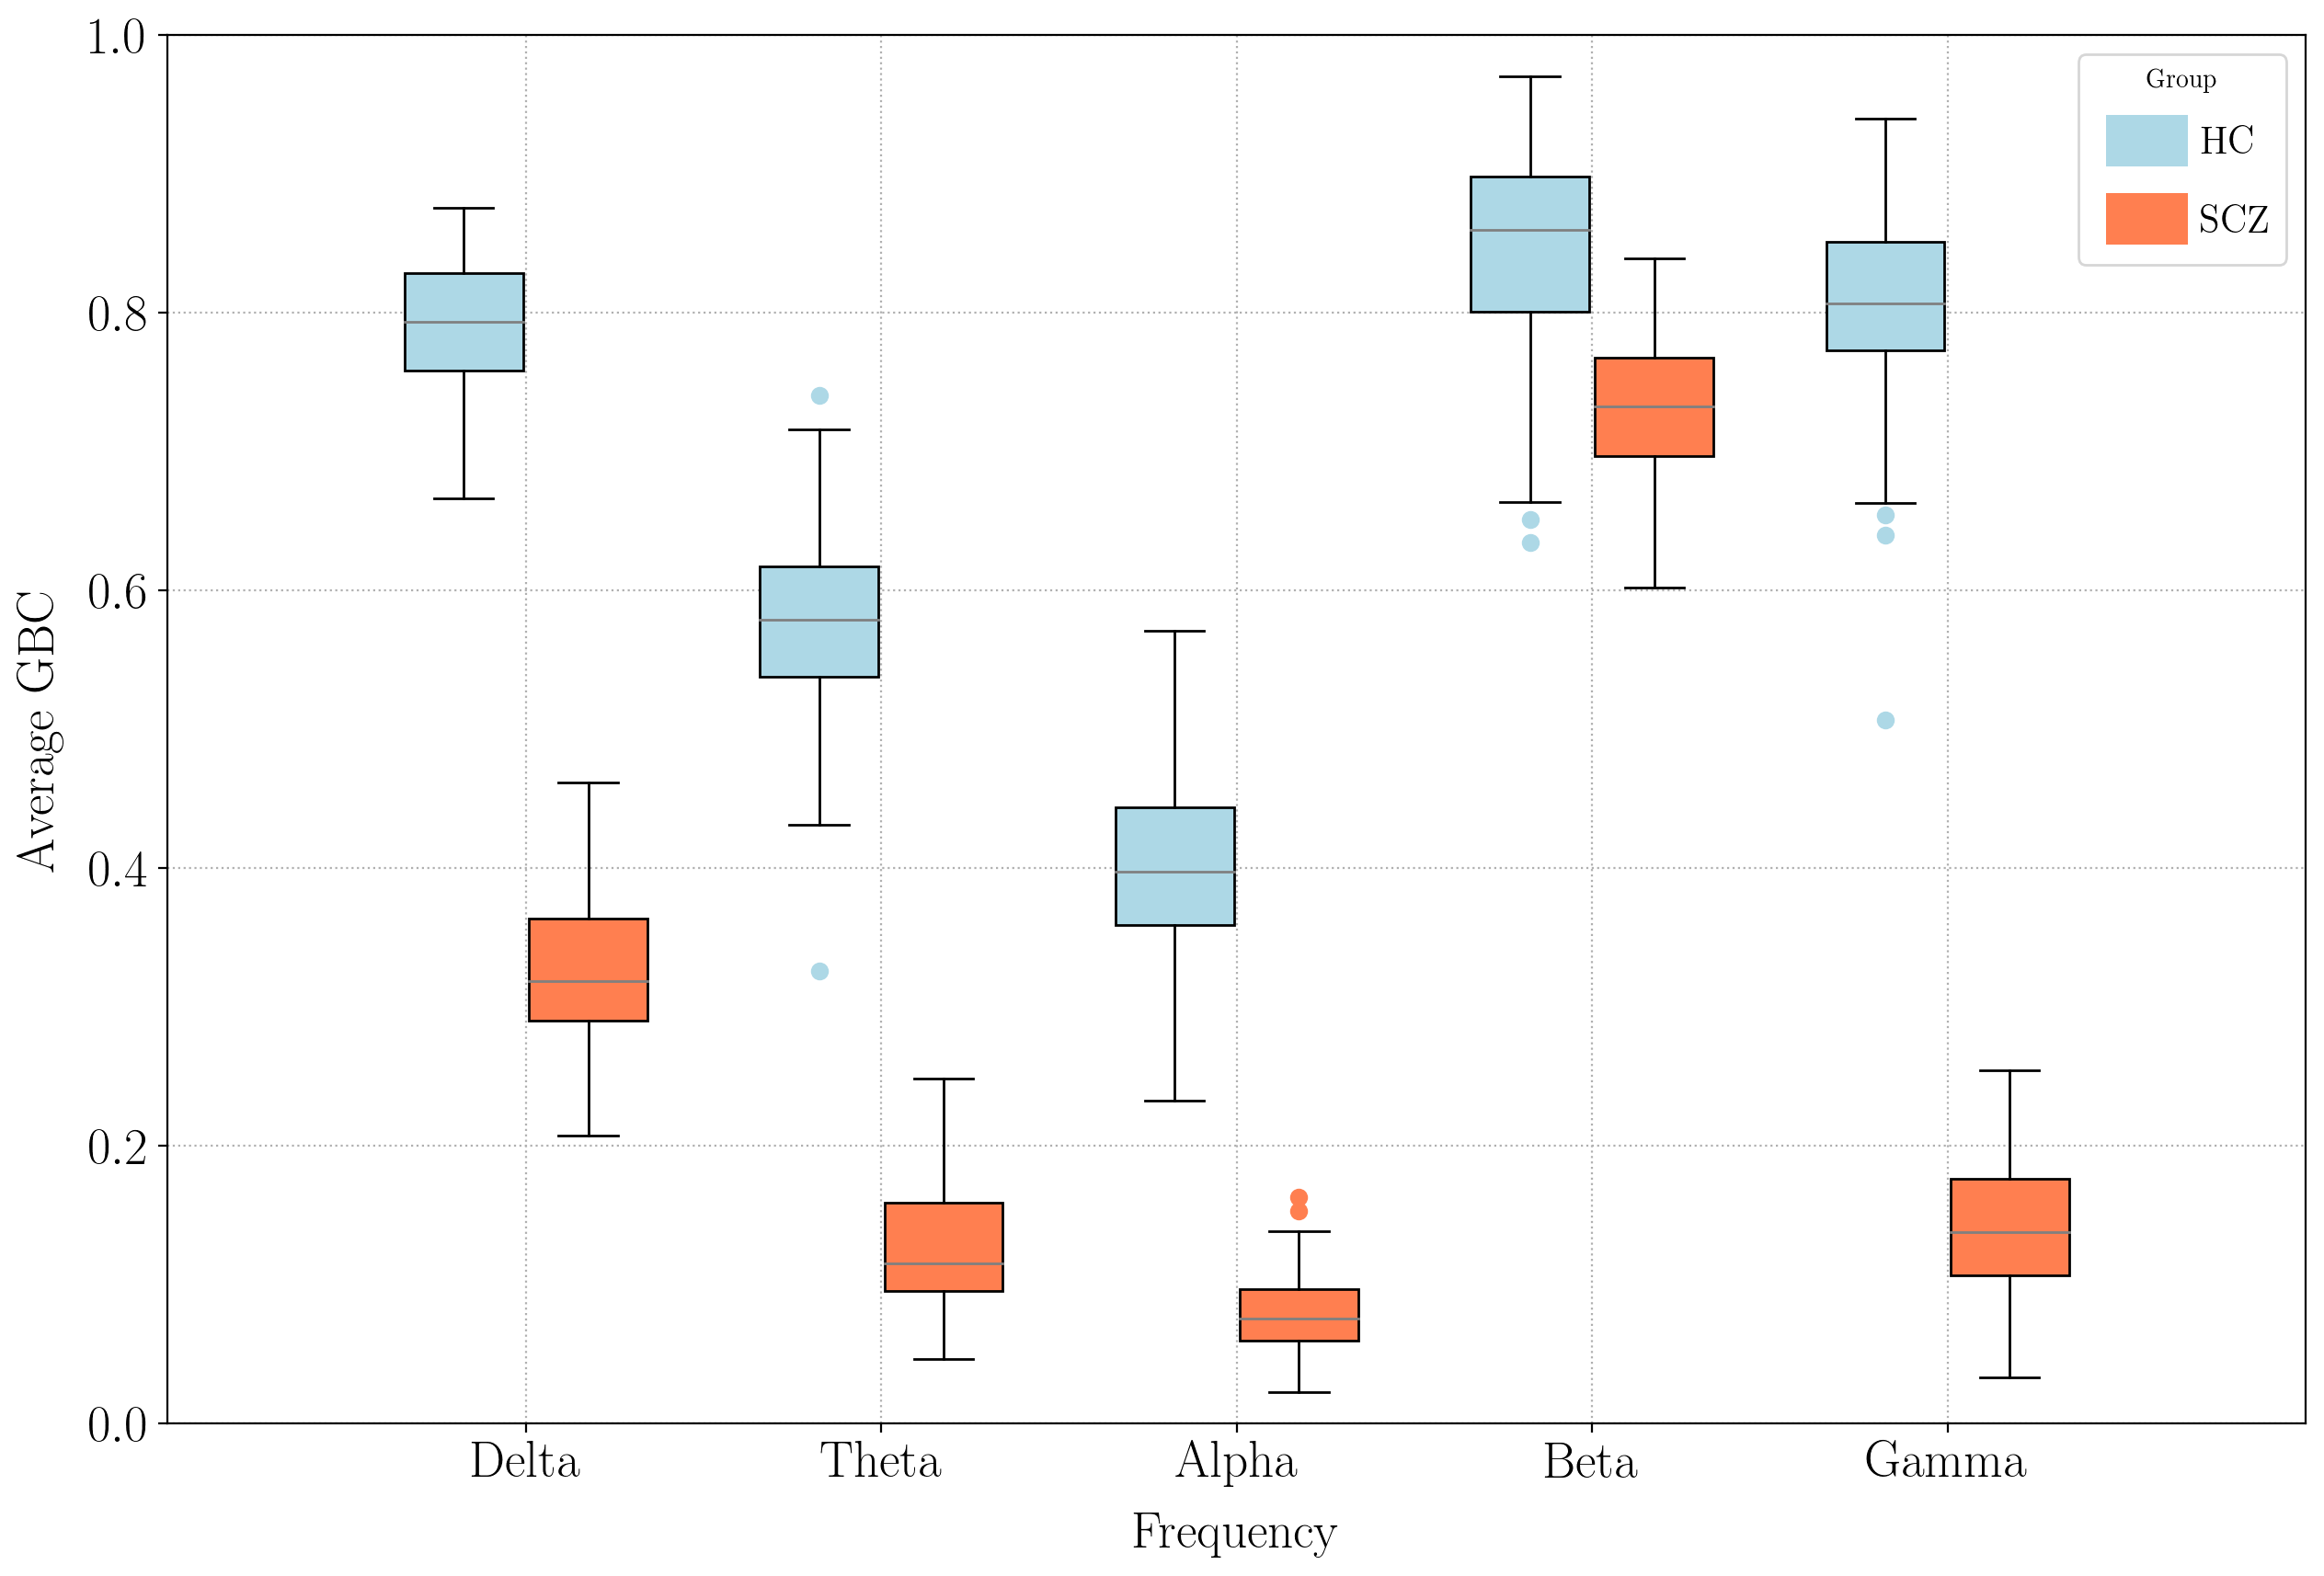

In [9]:
import matplotlib.pyplot as pl
import matplotlib as mpl
mpl.rcParams['figure.dpi']= 150
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20

from matplotlib import rc
import matplotlib.pylab as plt

rc('text', usetex=True)
from matplotlib import rc
import matplotlib.pylab as plt

rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)

from matplotlib.pyplot import figure
f = figure(figsize=(15, 10), dpi=200)

f.set_facecolor('w') 

#hc = [gbc_delta, gbc_theta, gbc_alpha, gbc_beta, gbc_gamma]
#scz = [gbc_delta_s, gbc_theta_s, gbc_alpha_s, gbc_beta_s, gbc_gamma_s]


colors = ['lightblue', 'coral']
data_groups = [hc, scz]

labels_list = ['Delta', 'Theta', 'Alpha', 'Beta', 'Gamma']
width       = 1/len(labels_list)
xlocations  = [ x*((1+ len(data_groups))*width) for x in range(len(hc))]

symbol      = 'r+'
ymin        = min ( [ val  for dg in data_groups  for data in dg for val in data ] )
ymax        = max ( [ val  for dg in data_groups  for data in dg for val in data ])

ax = pl.gca()
ax.set_ylim(ymin-0.1,ymax+0.1)

ax.grid(True, linestyle='dotted')
ax.set_axisbelow(True)

pl.xlabel('Frequency', fontsize=20, loc="center", labelpad = 10)
pl.ylabel('Average GBC', fontsize=20, labelpad = 10)
#pl.title('title')

space = len(data_groups)/2
offset = len(data_groups)/2


group_positions = []
for num, dg in enumerate(data_groups):    
    _off = (0 - space + (0.5+num))
    print(_off)
    group_positions.append([x+_off*(width+0.01) for x in xlocations])

for dg, pos, c in zip(data_groups, group_positions, colors):
    boxes = ax.boxplot(dg, 
                sym=c,
                labels=['']*len(labels_list),
                positions=pos, 
                widths=width, 
                boxprops=dict(facecolor=c),                      
                medianprops=dict(color='grey'),
                patch_artist=True,
                )
    
mpl.rcParams['legend.handlelength'] = 2
mpl.rcParams['legend.handleheight'] = 2
ax.set_xticks(xlocations)
ax.set_xticklabels(labels_list, rotation=0)
ax.set_ylim([0, 1])


import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerPatch



class HandlerRect(HandlerPatch):

    def create_artists(self, legend, orig_handle,
                       xdescent, ydescent, width, height,
                       fontsize, trans):

        x = width//2
        y = 0
        w = h = 10
        p = patches.Rectangle(xy=(x-10, y-5), width=w+22, height=h+10)
        self.update_prop(p, orig_handle, legend)
        p.set_transform(trans)

        return [p]


rect = patches.Rectangle((0,0), 1, 1, facecolor='lightblue')
rect2 = patches.Rectangle((0,0), 1, 1, facecolor='coral')

plt.legend((rect, rect2), ('HC', 'SCZ'),
            handler_map={
               patches.Rectangle: HandlerRect(),
               patches.Rectangle: HandlerRect(),
            }, title = "Group", prop={'size': 15})

plt.rcParams['legend.title_fontsize'] = 24

pl.show()

In [12]:
import pingouin as pg

res = pg.ttest([0.7918581515174539, 0.7249582919377286, 0.8391330760217902, 0.7463415744385758, 0.7742094771448351, 0.7398932519327253, 0.7762802400247224, 0.8166775979934764, 0.7880070051726625, 0.7165611641049248, 0.769764274587738, 0.7712131009044826, 0.7120810009181624, 0.8053447574357784, 0.751823641364391, 0.7860809016274278, 0.820854767696992, 0.8346201389925391, 0.7985601327543698, 0.7725349756807002, 0.7327875205100952, 0.7534382630807138, 0.6940902623632158, 0.8287550641032777, 0.8518018741539168, 0.8414482521380202, 0.7793026833525297, 0.8021341177638641, 0.7917922275305732, 0.8536819053105265, 0.7948434408936909, 0.8134669772355789, 0.8194605418795384, 0.7589601791665567, 0.8032498991651701, 0.8329298175405307, 0.8556932434132106, 0.8488296397658275, 0.7637682530326102, 0.8104453201069474, 0.8388986026440193, 0.869343560092897, 0.8699023349406264, 0.8087460529427029, 0.7693659910411661, 0.8008383822802426, 0.7948860324119157, 0.792638124458755, 0.8410624830895661, 0.8093395858943534, 0.8578456707758433, 0.7891681272919451, 0.7757974793594835, 0.8694350282957, 0.7295225262655961, 0.784665026351956, 0.8463563130155568, 0.8293200543275738, 0.8096854953983936, 0.7786095994996532, 0.8267480132707168, 0.7302349475065408, 0.748402060306134, 0.8754753884614105, 0.7483206008912074, 0.7164905861007108, 0.7529507885259923, 0.7713494563473747, 0.8196060640807954, 0.8092269654457798, 0.7892328570083255, 0.7346823685009055, 0.7796758531227909, 0.8308850837878577, 0.7311700864048373, 0.7296293494959312, 0.7335946226205323, 0.7634789199483006, 0.8485434426289844, 0.756662639284099, 0.8297221252268351, 0.666645336166973, 0.8010686790419882, 0.7494342402228372, 0.827119142842572, 0.8517685103083233, 0.7687386612175817, 0.8043927802752543, 0.7141992218876619, 0.7784789057241999, 0.8391933854272103, 0.8397824233016614, 0.8661299711551804, 0.7554485192002867, 0.7670464480163716, 0.722975912106817, 0.8727321709579922, 0.8241129446814672, 0.8225532666509339, 0.8106651179725628], [0.34914224544410843, 0.3901573472242862, 0.31923433089473396, 0.43702824524394857, 0.3099883267063552, 0.3153667775933579, 0.274470908364604, 0.30111116994178017, 0.39994200015463605, 0.3169493352648792, 0.3443645587410792, 0.2998604253896175, 0.2580203024822945, 0.33433407338897686, 0.27546154419826707, 0.34756079501172077, 0.3524606807927928, 0.36495105901619196, 0.3834177764050179, 0.42765567755619327, 0.45815546725791306, 0.4080117154801093, 0.3880061965259274, 0.3873361252186648, 0.2544282732057887, 0.2686216525759365, 0.28570735818581383, 0.37573460739956555, 0.29811218322611155, 0.4617220343578184, 0.31097114242626545, 0.3037045284172723, 0.3306458073994388, 0.3917536554130606, 0.29795404256176755, 0.3909464365437884, 0.31717113204681235, 0.29286615860060017, 0.3350774057427253, 0.2985510559737141, 0.32908698400791747, 0.44683662684232445, 0.3025402219024603, 0.2903472961233675, 0.35441956233552263, 0.34976237860734616, 0.2673597440075116, 0.35395910832822075, 0.2528556859724131, 0.3130723105237197, 0.4055103927951887, 0.3511702739260481, 0.2975242569775113, 0.2901521431718742, 0.2666847798063285, 0.2472623492477466, 0.32040442201814956, 0.22059815212529796, 0.37702591791205525, 0.2560146930961542, 0.3455101940895852, 0.3065321806905871, 0.3757033617516332, 0.2808372290890919, 0.32852896035950147, 0.20733852374525544, 0.37985023655898437, 0.3395677821230545, 0.30337706005041587, 0.2472681697807042, 0.42210896192164027, 0.2931023521920316, 0.3187832555858209, 0.24630949772733512, 0.3339869008729889, 0.3344155976502951, 0.42970963390931627, 0.364813476816012, 0.397447685031167, 0.22356323006248638, 0.25593505239086617, 0.2841955017447211, 0.2905379956498347, 0.2963119419386207, 0.3395260791931864, 0.36319145479735754, 0.3983992822910718, 0.3227317853908494, 0.29050152361582265, 0.31299610415406454, 0.3619910953929903, 0.23544919140237788, 0.36927771558012973, 0.23730102852146878, 0.36321473055879194, 0.26681321795754476, 0.2619044886234313, 0.3266244302743451, 0.3107355015440848, 0.22027218581883035], correction=False)
display(res)
res = pg.ttest([0.6365386000569047, 0.32633704353405757, 0.6053119687496009, 0.5718174043456767, 0.5195626259643865, 0.5403492857457207, 0.6327188487764558, 0.6462771895520163, 0.5328472341118399, 0.5160730155312394, 0.6029263325328099, 0.47802669052530616, 0.5164738669085921, 0.5920781857709925, 0.6651423194852333, 0.5198810654249976, 0.6251523435383279, 0.6558827989982403, 0.5383724893732497, 0.537177678014131, 0.5251610093472006, 0.46758289912386103, 0.48937507215411996, 0.5622126455455992, 0.699840715201708, 0.6160475268433113, 0.5796276435298209, 0.6052507739802234, 0.578075174265903, 0.6129006730311324, 0.5890889062641901, 0.5146812927028882, 0.7160601009724679, 0.5331965856208571, 0.6163019699742429, 0.5958297961971919, 0.5586465323776172, 0.6462347359982925, 0.5303324997739156, 0.553012804796192, 0.5393821163414246, 0.5599965849249201, 0.5709326820026361, 0.5447349082496054, 0.6150683904425729, 0.6352217786363313, 0.5849046243829119, 0.5502312489600004, 0.6570360336496452, 0.5789285643171048, 0.5362422418076405, 0.4877691164924315, 0.5736148609119172, 0.6832444935649588, 0.5813505961201261, 0.5326284095593771, 0.5929914667052721, 0.5732074307957116, 0.5940946577630644, 0.47796940175627733, 0.6650869852803695, 0.4311612660427994, 0.5378393407804397, 0.661850638346108, 0.4853650952460993, 0.5573021416286684, 0.5717874350707102, 0.6004759257826224, 0.5882709560670896, 0.5216423338191304, 0.6785651146441779, 0.5204029860091343, 0.5694146597442925, 0.6434881606645189, 0.5519020991110225, 0.48845258069724734, 0.5625954246064512, 0.6115532219432445, 0.7405478096596164, 0.5888544165478341, 0.5716888827026723, 0.5567158941403854, 0.5290597687094712, 0.5444604002135995, 0.5905888936960865, 0.6118321054085614, 0.661642974801315, 0.5985920704540565, 0.5207794503642246, 0.6060306553866549, 0.6116076666014402, 0.6351172690006838, 0.6074434789179868, 0.578679768123438, 0.6311136085641862, 0.6220078440688132, 0.6624755689656405, 0.6717597511906301, 0.6895485369465834, 0.675837363530451], [0.08894041427661746, 0.2477119682511311, 0.10284613088597298, 0.14791852032699196, 0.07851132721227413, 0.22990739780359873, 0.09250271331937537, 0.09491777442468084, 0.18122718351393266, 0.08726648149313285, 0.10086415758521444, 0.15686117375003059, 0.06826673498768983, 0.10109697810910098, 0.1010949252974375, 0.18252538769123092, 0.12734606303339926, 0.19216444844109326, 0.21397304526324581, 0.07334040705801351, 0.18747222633497362, 0.24841947812535856, 0.16418262388657603, 0.09797954254516374, 0.08793718654470498, 0.09290519685186947, 0.17266623238172094, 0.06959867507177517, 0.12268511485573605, 0.11196941251611875, 0.05278825205587429, 0.1295830730345133, 0.12651903929602656, 0.1587225643012124, 0.12504473982540906, 0.11415635332132369, 0.16022266058120316, 0.10935351285455353, 0.07033780870829462, 0.14561884403632763, 0.14227795049397518, 0.09587655222690157, 0.11356570942032022, 0.16570337535524043, 0.12970806642470797, 0.08841043852906384, 0.10178728593348442, 0.16778081638931985, 0.11334601228383612, 0.1374668566323557, 0.1968580613096065, 0.17990326967832337, 0.20439092661148892, 0.06214678898336362, 0.05451078407803071, 0.1331703443722568, 0.16072928715145451, 0.04644358644894799, 0.09953313831789191, 0.06782743658624492, 0.179760169026514, 0.11917179743503235, 0.0709945042886542, 0.19177051121646876, 0.10923814224579691, 0.17869300663940965, 0.09012952766026032, 0.10997433380884213, 0.06508220568592736, 0.10973628538991019, 0.13637487951937777, 0.11266287233383072, 0.07846464956704911, 0.11220788328373431, 0.14768117520668464, 0.07181416375575235, 0.07414822390839088, 0.11404221471301419, 0.15297592428574072, 0.07493281588160115, 0.10491821967384064, 0.12423223910255339, 0.15104771793644037, 0.147765194718945, 0.11626920046766202, 0.15651983804640912, 0.18481835825421275, 0.14428418722649944, 0.1114195679340326, 0.17966502277097682, 0.1301975594381271, 0.1014249075559399, 0.2254117224518653, 0.17432367871711318, 0.119024243809565, 0.0843101319124295, 0.1024100823136481, 0.11117330037334378, 0.10128925699562066, 0.1718277812023369], correction=False)
display(res)
res = pg.ttest([0.3504223559974693, 0.2327073992492748, 0.4423287714557925, 0.41149236273339135, 0.33019787369708015, 0.4276915898040883, 0.3299709407547821, 0.4693806894509557, 0.28829265172081575, 0.32858086052010493, 0.3007979673822935, 0.31409046582498257, 0.3595819173300077, 0.26199390356127755, 0.4809820373986945, 0.3741861990640532, 0.5038932638395209, 0.5709168523807336, 0.44218547120229745, 0.41881888748725216, 0.3638627217601259, 0.32833106554188474, 0.34279096074668675, 0.4873608480767804, 0.43714217658749893, 0.3829335981423094, 0.4914568192565019, 0.4011944296935407, 0.4629036503020852, 0.37922019608418367, 0.5189163392650396, 0.3792134140539791, 0.5175052913811211, 0.4860832796530235, 0.4528605741468421, 0.4269491156275883, 0.36464175231365287, 0.4418691916338463, 0.39011742541197875, 0.4144127782227169, 0.42425879843062203, 0.4858504820382542, 0.364816017565339, 0.3920525589133044, 0.47154244173033577, 0.39052366599721183, 0.3796427128296256, 0.4027414974407859, 0.3937500482952014, 0.33711791787438955, 0.36213488801014193, 0.2501789320873049, 0.39439917643537115, 0.369426328482929, 0.5093640389943812, 0.38825068634388976, 0.314468042589377, 0.46418884533028276, 0.345251279481849, 0.30136704092088473, 0.49900087989439085, 0.4044283401931034, 0.4187152443502102, 0.5055881076708303, 0.3791433117136742, 0.37778816496399253, 0.3791066933649357, 0.4214939033910201, 0.3976172218042301, 0.2845388781758703, 0.3503732382930721, 0.40364373924668273, 0.47383270826553003, 0.39999382088119695, 0.43212410806769014, 0.3555493599707604, 0.3959705609540209, 0.45518121887243806, 0.512648046900687, 0.40727629955989886, 0.3581736112813042, 0.3849744277614746, 0.2691339209073791, 0.37940611961079385, 0.3037508583510846, 0.4314866367047119, 0.3602538135430865, 0.44924965392548416, 0.27838147993531676, 0.4131399569575062, 0.41982500153411423, 0.3537377982814499, 0.39725103211831, 0.4628207406459724, 0.4202289397581371, 0.5080276123807156, 0.41650636040374395, 0.4703611330372259, 0.4676220674132751, 0.35842369238354493], [0.054366668780673075, 0.06556832481842019, 0.05688571610382091, 0.04175792811328918, 0.11158825268850169, 0.1166929420577782, 0.06683372186625464, 0.06920859215111333, 0.09941092025100884, 0.10770510623771969, 0.07526563726120232, 0.07745758970977777, 0.13188641034471935, 0.05495194865712961, 0.0954495172604505, 0.05453418489500098, 0.05775012184625574, 0.04469198346530931, 0.07462040726868131, 0.06085187909594948, 0.07390208382444854, 0.07565232328366785, 0.022434280518214656, 0.05772812885787507, 0.095906264692088, 0.06810615802498024, 0.1632993850306546, 0.062323107272922985, 0.05490949310925772, 0.05622975379731306, 0.09870469217747461, 0.13876971899674026, 0.034138862032550794, 0.06681370272105522, 0.05952315683393939, 0.0961680351040928, 0.04682004535896489, 0.11870135779461362, 0.08268022054653279, 0.09828817412902302, 0.13065548948495703, 0.10266373659963769, 0.07997302536599707, 0.06657822882289868, 0.05088585456735435, 0.09304297733532821, 0.11183782712605758, 0.15303359457665947, 0.1303778085756726, 0.05187821032530698, 0.05965848076796551, 0.06247528435992459, 0.12240121941590446, 0.06479944255961355, 0.10124437441591708, 0.09656438892483217, 0.0970019936619282, 0.05910430013440437, 0.04088492711238598, 0.03905521403723738, 0.11705106871829297, 0.07618439322534586, 0.0892004420731759, 0.09122165327415999, 0.13776380766132287, 0.06676836691245097, 0.059092973716339585, 0.0829188180946103, 0.11167571260016608, 0.0766445699798206, 0.06259870329935467, 0.09275522939173479, 0.08004299573115016, 0.043391085803505466, 0.07437555773430451, 0.06930530254665278, 0.09074186819246359, 0.08245521964625127, 0.08925650957574742, 0.059953986792981785, 0.1305060333330976, 0.06938786339679238, 0.09235323393337752, 0.0528356717522786, 0.08590271579999316, 0.062073559384848244, 0.06777875815062046, 0.0660652559284674, 0.08117832760123983, 0.09260272870776372, 0.1195210567391563, 0.11712172261468924, 0.07447357347550704, 0.08062068529591228, 0.05308252180547096, 0.047810506188729104, 0.11777349316442878, 0.08727587324840894, 0.053272700530244105, 0.06557861869411463], correction=False)
display(res)
res = pg.ttest([0.9149803384071414, 0.86292588846449, 0.7494629222510594, 0.8007578394715997, 0.9703273171221676, 0.8287371982528274, 0.9143245583316972, 0.8628680554405878, 0.6635556083659293, 0.9642738636511824, 0.6347753724531082, 0.8935283289994413, 0.9129955273039869, 0.8008332476466095, 0.8964096800106662, 0.8873590110577907, 0.7586657913552918, 0.8811397796019957, 0.8730238073239626, 0.8891324524936788, 0.9164041267684451, 0.8995641946956725, 0.8552944475458264, 0.8473800632055516, 0.8667932943710871, 0.7327127463926935, 0.8008077132429966, 0.9443562950606345, 0.8186943701449367, 0.8288988704398466, 0.9568828186221979, 0.9200333719253483, 0.7902729511004606, 0.8728680019727812, 0.8588466480437847, 0.8922061408579907, 0.9139513648533335, 0.9305330492384394, 0.8897562944355593, 0.9266434074489305, 0.8646535905028497, 0.918642654886305, 0.9319825699002824, 0.7648625045523394, 0.8399569213364113, 0.8217430824977738, 0.7743252993110309, 0.74413122488398, 0.739663469386663, 0.884433990649643, 0.6781146950245263, 0.8238135447428799, 0.7634952946166925, 0.8123113630058529, 0.8829255464747896, 0.9390326410948474, 0.9512426544253327, 0.8858354569337245, 0.8213115455415854, 0.8354112041657182, 0.8655999266725266, 0.8854730134109193, 0.9091943879436946, 0.8161480951187212, 0.839027621583233, 0.7218105231421102, 0.7937411961576208, 0.8720487330863074, 0.8767259889411316, 0.8550731818324787, 0.7470074992804097, 0.7276066848383763, 0.9339917733982256, 0.9511302354679834, 0.6666280321903811, 0.8174475978528939, 0.9033368731818783, 0.7338637646254376, 0.7766454063941504, 0.8654410905749185, 0.8605808676885879, 0.9361073027202447, 0.8982097492097298, 0.7765275211147081, 0.8626680847574285, 0.6510317084616376, 0.7278307606518344, 0.9393399818184733, 0.9478906340506467, 0.8049743731737066, 0.8012387865546157, 0.8155188004483109, 0.8482475274197432, 0.858574080452707, 0.8467894061163189, 0.918904152278002, 0.7272362091071898, 0.7745461092176589, 0.8925941459297229, 0.8219302855462847], [0.7858512000055359, 0.7928687358956672, 0.6539295389749508, 0.7790862797979363, 0.6515123248399814, 0.7749052018187476, 0.7960449206065996, 0.8084997887707505, 0.750343399856944, 0.7670143916580348, 0.6572124941589462, 0.810900895918339, 0.670242808482895, 0.631196016898465, 0.6075275021896894, 0.7260006335363869, 0.6457279809128118, 0.7003700500787085, 0.6896474977659487, 0.7960001922014714, 0.6723158610430582, 0.7337820055162035, 0.6970247706656775, 0.7476931407195033, 0.7264619093296041, 0.6023482544001859, 0.7056799910246749, 0.7469025548776236, 0.7822142438141532, 0.7201824786440298, 0.7418717230553012, 0.7071377544033091, 0.7689815686014303, 0.709218909875814, 0.6965666918321576, 0.6102105003854419, 0.7490508287508826, 0.6580018644853606, 0.7311448695953014, 0.7549541989205563, 0.704993355432227, 0.6890617218564263, 0.7043340727177195, 0.8365603850377576, 0.7516722720676989, 0.6079357889159642, 0.7734493612879695, 0.7020501159016086, 0.788980750072767, 0.7581612491915257, 0.7534259376673844, 0.7429161600103084, 0.8012384885622227, 0.6743815594716698, 0.6904844458013157, 0.7358407610538455, 0.8393007510394058, 0.743014872138942, 0.7303726246780718, 0.7322425977249768, 0.7146728771912697, 0.7573084067585661, 0.7367957728714437, 0.7268733761385918, 0.6181461693033861, 0.7138583539438315, 0.7553040493808186, 0.6678607933043385, 0.7989526742438602, 0.6768982836237499, 0.7765781267905121, 0.8197493841750749, 0.7054129911121811, 0.8329977657596944, 0.7889951945060453, 0.6707821061150022, 0.7775748784827132, 0.7901545276212084, 0.7707582755611818, 0.8393351819142305, 0.7473174817742083, 0.7628243642335153, 0.7789103517231633, 0.7167933762234949, 0.6500906309574803, 0.6973860565950543, 0.7141399399466528, 0.7390091320728661, 0.71759624683825, 0.7014181246956704, 0.7343457865779418, 0.6230797425028147, 0.7539084303409003, 0.7631727813514594, 0.7568812257523264, 0.641078180501344, 0.7061979328692063, 0.666800624386346, 0.7491706821529129, 0.7066606494103473], correction=False)
display(res)
res = pg.ttest([0.8290306502142297, 0.7532306866850377, 0.7940386474716231, 0.8130198894062315, 0.8418637701660774, 0.8174539582798288, 0.8982485036254141, 0.7711926888680994, 0.7663832315350058, 0.9012533665923195, 0.5068868952610758, 0.8024242171791698, 0.74985144411042, 0.7489345779345128, 0.8397641170272465, 0.7826848804550647, 0.7873677225561565, 0.7730888234830928, 0.8442426663303081, 0.8690708709959832, 0.7892468409151607, 0.8370513832463016, 0.7797528385004443, 0.7832082151948149, 0.8330754306522498, 0.8095571175140218, 0.7830894277424659, 0.8778383162252408, 0.8014185323033687, 0.7946093680759481, 0.8840753893337799, 0.9254805827746457, 0.8524165555339053, 0.7009214985236031, 0.8311776471610302, 0.8229076585606674, 0.9171329140792165, 0.8506269734449896, 0.735737936417009, 0.77961280418168, 0.9046921335738546, 0.8778528921243755, 0.8602271491954525, 0.7757090395528059, 0.7974576237064315, 0.8736864461118153, 0.7708343000291157, 0.7685287568826904, 0.8078722410189115, 0.7818296106724497, 0.7855385729710802, 0.8737157357327276, 0.7838212024707042, 0.7024002116995502, 0.8067017276020368, 0.7642080559366531, 0.7727253990578211, 0.80350278325233, 0.8063459073839485, 0.8278953038750175, 0.9025290683553672, 0.8774778226953529, 0.9398549216304594, 0.8007825796751575, 0.7736477266395813, 0.6396796158881394, 0.6545028312310514, 0.8577378868175947, 0.8073414704188755, 0.6630143757272677, 0.7379398529710156, 0.7292519569413752, 0.8309380227673031, 0.9224369011783529, 0.6641523022627394, 0.8865626402851103, 0.7598078517133818, 0.7746973766318166, 0.8623348131440121, 0.8120703190371478, 0.8286778763347672, 0.8262724120443349, 0.7581103904419797, 0.777103750277496, 0.8389506953619101, 0.8476693812188278, 0.7574535877516104, 0.8303150880684782, 0.8676191893052676, 0.9156154618066352, 0.7374315994898124, 0.8667311407801901, 0.9148117181847352, 0.9074606557268214, 0.8247320886069754, 0.6970942391560544, 0.7380072086147627, 0.8263213561755165, 0.8272224920704204, 0.7737727625434523], [0.184743007822843, 0.18639679308598242, 0.08869384394202502, 0.12827354024095158, 0.18539239689332468, 0.11221811268563042, 0.14553277636198347, 0.16577581173182165, 0.11846421359140714, 0.14660123023254001, 0.206639097368419, 0.22388517202506047, 0.07806463061752084, 0.11204738012713415, 0.09123019755255606, 0.11392367209385423, 0.10698607948023656, 0.1576135531305329, 0.163929164603085, 0.20378735555660796, 0.10712370548844337, 0.1419115313840771, 0.08233592808589597, 0.1107672037467657, 0.15770220695643825, 0.06283100381060207, 0.12392240694033298, 0.1382909761125799, 0.10678775140411932, 0.22929045029666267, 0.16091902840600045, 0.13397687523209517, 0.18075455096527626, 0.20639652137946043, 0.11129002429534136, 0.18258124461599132, 0.2084099678942168, 0.09603354248025678, 0.1421476368800775, 0.21706433084297028, 0.15342124019551148, 0.05239257225880227, 0.059300736178068546, 0.13797984803880703, 0.1881940051867784, 0.19669819763348312, 0.12283394880412728, 0.1575200085531647, 0.18430401148254774, 0.07702458260572918, 0.0936523961366992, 0.18767348070034115, 0.1406132983212072, 0.15047943678570344, 0.1319539807803137, 0.25445691720511254, 0.18285657234915276, 0.08833098825283382, 0.18952641528676606, 0.1745534620225005, 0.08667664422231564, 0.14180089458058515, 0.11270847806417368, 0.07092727987763463, 0.10143759339842777, 0.11197451024991459, 0.11009725716372486, 0.049757560333752816, 0.11144696194806253, 0.07937816506547304, 0.15271550770267528, 0.142663781296154, 0.08780043218321898, 0.17737976712743259, 0.15346404027151933, 0.08424169750688737, 0.1451080510514132, 0.10362913772939197, 0.24599220007846603, 0.11822190112649303, 0.11737771065698402, 0.17576486666670235, 0.1400560750901779, 0.13599990795575104, 0.10262771782692734, 0.09937793205434854, 0.14081971031152926, 0.20630066307820713, 0.18420714493070178, 0.16346920919992286, 0.1842374900722551, 0.06445267653913776, 0.13418061395783196, 0.12198329574870055, 0.11768973167329545, 0.03318373231406212, 0.13155370601574515, 0.19216014385343222, 0.14880950957970887, 0.11189419401275831], correction=False)
display(res)

,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,63.815306,198,two-sided,5.209517e-134,"[0.45, 0.48]",9.024847,5.06e+129,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,57.361505,198,two-sided,2.607245e-125,"[0.44, 0.47]",8.112142,1.136e+121,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,43.791619,198,two-sided,8.393645e-104,"[0.3, 0.33]",6.19307,4.785e+99,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,12.19565,198,two-sided,6.986028e-26,"[0.1, 0.13]",1.724725,3.801e+22,1.0


,T,dof,alternative,p-val,CI95%,cohen-d,BF10,power
T-test,80.068079,198,two-sided,8.643300e-153,"[0.65, 0.68]",11.323336,2.395e+148,1.0


In [13]:
import numpy as np
print(np.std([0.7918581515174539, 0.7249582919377286, 0.8391330760217902, 0.7463415744385758, 0.7742094771448351, 0.7398932519327253, 0.7762802400247224, 0.8166775979934764, 0.7880070051726625, 0.7165611641049248, 0.769764274587738, 0.7712131009044826, 0.7120810009181624, 0.8053447574357784, 0.751823641364391, 0.7860809016274278, 0.820854767696992, 0.8346201389925391, 0.7985601327543698, 0.7725349756807002, 0.7327875205100952, 0.7534382630807138, 0.6940902623632158, 0.8287550641032777, 0.8518018741539168, 0.8414482521380202, 0.7793026833525297, 0.8021341177638641, 0.7917922275305732, 0.8536819053105265, 0.7948434408936909, 0.8134669772355789, 0.8194605418795384, 0.7589601791665567, 0.8032498991651701, 0.8329298175405307, 0.8556932434132106, 0.8488296397658275, 0.7637682530326102, 0.8104453201069474, 0.8388986026440193, 0.869343560092897, 0.8699023349406264, 0.8087460529427029, 0.7693659910411661, 0.8008383822802426, 0.7948860324119157, 0.792638124458755, 0.8410624830895661, 0.8093395858943534, 0.8578456707758433, 0.7891681272919451, 0.7757974793594835, 0.8694350282957, 0.7295225262655961, 0.784665026351956, 0.8463563130155568, 0.8293200543275738, 0.8096854953983936, 0.7786095994996532, 0.8267480132707168, 0.7302349475065408, 0.748402060306134, 0.8754753884614105, 0.7483206008912074, 0.7164905861007108, 0.7529507885259923, 0.7713494563473747, 0.8196060640807954, 0.8092269654457798, 0.7892328570083255, 0.7346823685009055, 0.7796758531227909, 0.8308850837878577, 0.7311700864048373, 0.7296293494959312, 0.7335946226205323, 0.7634789199483006, 0.8485434426289844, 0.756662639284099, 0.8297221252268351, 0.666645336166973, 0.8010686790419882, 0.7494342402228372, 0.827119142842572, 0.8517685103083233, 0.7687386612175817, 0.8043927802752543, 0.7141992218876619, 0.7784789057241999, 0.8391933854272103, 0.8397824233016614, 0.8661299711551804, 0.7554485192002867, 0.7670464480163716, 0.722975912106817, 0.8727321709579922, 0.8241129446814672, 0.8225532666509339, 0.8106651179725628]))
print(np.std([0.6365386000569047, 0.32633704353405757, 0.6053119687496009, 0.5718174043456767, 0.5195626259643865, 0.5403492857457207, 0.6327188487764558, 0.6462771895520163, 0.5328472341118399, 0.5160730155312394, 0.6029263325328099, 0.47802669052530616, 0.5164738669085921, 0.5920781857709925, 0.6651423194852333, 0.5198810654249976, 0.6251523435383279, 0.6558827989982403, 0.5383724893732497, 0.537177678014131, 0.5251610093472006, 0.46758289912386103, 0.48937507215411996, 0.5622126455455992, 0.699840715201708, 0.6160475268433113, 0.5796276435298209, 0.6052507739802234, 0.578075174265903, 0.6129006730311324, 0.5890889062641901, 0.5146812927028882, 0.7160601009724679, 0.5331965856208571, 0.6163019699742429, 0.5958297961971919, 0.5586465323776172, 0.6462347359982925, 0.5303324997739156, 0.553012804796192, 0.5393821163414246, 0.5599965849249201, 0.5709326820026361, 0.5447349082496054, 0.6150683904425729, 0.6352217786363313, 0.5849046243829119, 0.5502312489600004, 0.6570360336496452, 0.5789285643171048, 0.5362422418076405, 0.4877691164924315, 0.5736148609119172, 0.6832444935649588, 0.5813505961201261, 0.5326284095593771, 0.5929914667052721, 0.5732074307957116, 0.5940946577630644, 0.47796940175627733, 0.6650869852803695, 0.4311612660427994, 0.5378393407804397, 0.661850638346108, 0.4853650952460993, 0.5573021416286684, 0.5717874350707102, 0.6004759257826224, 0.5882709560670896, 0.5216423338191304, 0.6785651146441779, 0.5204029860091343, 0.5694146597442925, 0.6434881606645189, 0.5519020991110225, 0.48845258069724734, 0.5625954246064512, 0.6115532219432445, 0.7405478096596164, 0.5888544165478341, 0.5716888827026723, 0.5567158941403854, 0.5290597687094712, 0.5444604002135995, 0.5905888936960865, 0.6118321054085614, 0.661642974801315, 0.5985920704540565, 0.5207794503642246, 0.6060306553866549, 0.6116076666014402, 0.6351172690006838, 0.6074434789179868, 0.578679768123438, 0.6311136085641862, 0.6220078440688132, 0.6624755689656405, 0.6717597511906301, 0.6895485369465834, 0.675837363530451]))
print(np.std([0.3504223559974693, 0.2327073992492748, 0.4423287714557925, 0.41149236273339135, 0.33019787369708015, 0.4276915898040883, 0.3299709407547821, 0.4693806894509557, 0.28829265172081575, 0.32858086052010493, 0.3007979673822935, 0.31409046582498257, 0.3595819173300077, 0.26199390356127755, 0.4809820373986945, 0.3741861990640532, 0.5038932638395209, 0.5709168523807336, 0.44218547120229745, 0.41881888748725216, 0.3638627217601259, 0.32833106554188474, 0.34279096074668675, 0.4873608480767804, 0.43714217658749893, 0.3829335981423094, 0.4914568192565019, 0.4011944296935407, 0.4629036503020852, 0.37922019608418367, 0.5189163392650396, 0.3792134140539791, 0.5175052913811211, 0.4860832796530235, 0.4528605741468421, 0.4269491156275883, 0.36464175231365287, 0.4418691916338463, 0.39011742541197875, 0.4144127782227169, 0.42425879843062203, 0.4858504820382542, 0.364816017565339, 0.3920525589133044, 0.47154244173033577, 0.39052366599721183, 0.3796427128296256, 0.4027414974407859, 0.3937500482952014, 0.33711791787438955, 0.36213488801014193, 0.2501789320873049, 0.39439917643537115, 0.369426328482929, 0.5093640389943812, 0.38825068634388976, 0.314468042589377, 0.46418884533028276, 0.345251279481849, 0.30136704092088473, 0.49900087989439085, 0.4044283401931034, 0.4187152443502102, 0.5055881076708303, 0.3791433117136742, 0.37778816496399253, 0.3791066933649357, 0.4214939033910201, 0.3976172218042301, 0.2845388781758703, 0.3503732382930721, 0.40364373924668273, 0.47383270826553003, 0.39999382088119695, 0.43212410806769014, 0.3555493599707604, 0.3959705609540209, 0.45518121887243806, 0.512648046900687, 0.40727629955989886, 0.3581736112813042, 0.3849744277614746, 0.2691339209073791, 0.37940611961079385, 0.3037508583510846, 0.4314866367047119, 0.3602538135430865, 0.44924965392548416, 0.27838147993531676, 0.4131399569575062, 0.41982500153411423, 0.3537377982814499, 0.39725103211831, 0.4628207406459724, 0.4202289397581371, 0.5080276123807156, 0.41650636040374395, 0.4703611330372259, 0.4676220674132751, 0.35842369238354493]))
print(np.std([0.9149803384071414, 0.86292588846449, 0.7494629222510594, 0.8007578394715997, 0.9703273171221676, 0.8287371982528274, 0.9143245583316972, 0.8628680554405878, 0.6635556083659293, 0.9642738636511824, 0.6347753724531082, 0.8935283289994413, 0.9129955273039869, 0.8008332476466095, 0.8964096800106662, 0.8873590110577907, 0.7586657913552918, 0.8811397796019957, 0.8730238073239626, 0.8891324524936788, 0.9164041267684451, 0.8995641946956725, 0.8552944475458264, 0.8473800632055516, 0.8667932943710871, 0.7327127463926935, 0.8008077132429966, 0.9443562950606345, 0.8186943701449367, 0.8288988704398466, 0.9568828186221979, 0.9200333719253483, 0.7902729511004606, 0.8728680019727812, 0.8588466480437847, 0.8922061408579907, 0.9139513648533335, 0.9305330492384394, 0.8897562944355593, 0.9266434074489305, 0.8646535905028497, 0.918642654886305, 0.9319825699002824, 0.7648625045523394, 0.8399569213364113, 0.8217430824977738, 0.7743252993110309, 0.74413122488398, 0.739663469386663, 0.884433990649643, 0.6781146950245263, 0.8238135447428799, 0.7634952946166925, 0.8123113630058529, 0.8829255464747896, 0.9390326410948474, 0.9512426544253327, 0.8858354569337245, 0.8213115455415854, 0.8354112041657182, 0.8655999266725266, 0.8854730134109193, 0.9091943879436946, 0.8161480951187212, 0.839027621583233, 0.7218105231421102, 0.7937411961576208, 0.8720487330863074, 0.8767259889411316, 0.8550731818324787, 0.7470074992804097, 0.7276066848383763, 0.9339917733982256, 0.9511302354679834, 0.6666280321903811, 0.8174475978528939, 0.9033368731818783, 0.7338637646254376, 0.7766454063941504, 0.8654410905749185, 0.8605808676885879, 0.9361073027202447, 0.8982097492097298, 0.7765275211147081, 0.8626680847574285, 0.6510317084616376, 0.7278307606518344, 0.9393399818184733, 0.9478906340506467, 0.8049743731737066, 0.8012387865546157, 0.8155188004483109, 0.8482475274197432, 0.858574080452707, 0.8467894061163189, 0.918904152278002, 0.7272362091071898, 0.7745461092176589, 0.8925941459297229, 0.8219302855462847]))
print(np.std([0.8290306502142297, 0.7532306866850377, 0.7940386474716231, 0.8130198894062315, 0.8418637701660774, 0.8174539582798288, 0.8982485036254141, 0.7711926888680994, 0.7663832315350058, 0.9012533665923195, 0.5068868952610758, 0.8024242171791698, 0.74985144411042, 0.7489345779345128, 0.8397641170272465, 0.7826848804550647, 0.7873677225561565, 0.7730888234830928, 0.8442426663303081, 0.8690708709959832, 0.7892468409151607, 0.8370513832463016, 0.7797528385004443, 0.7832082151948149, 0.8330754306522498, 0.8095571175140218, 0.7830894277424659, 0.8778383162252408, 0.8014185323033687, 0.7946093680759481, 0.8840753893337799, 0.9254805827746457, 0.8524165555339053, 0.7009214985236031, 0.8311776471610302, 0.8229076585606674, 0.9171329140792165, 0.8506269734449896, 0.735737936417009, 0.77961280418168, 0.9046921335738546, 0.8778528921243755, 0.8602271491954525, 0.7757090395528059, 0.7974576237064315, 0.8736864461118153, 0.7708343000291157, 0.7685287568826904, 0.8078722410189115, 0.7818296106724497, 0.7855385729710802, 0.8737157357327276, 0.7838212024707042, 0.7024002116995502, 0.8067017276020368, 0.7642080559366531, 0.7727253990578211, 0.80350278325233, 0.8063459073839485, 0.8278953038750175, 0.9025290683553672, 0.8774778226953529, 0.9398549216304594, 0.8007825796751575, 0.7736477266395813, 0.6396796158881394, 0.6545028312310514, 0.8577378868175947, 0.8073414704188755, 0.6630143757272677, 0.7379398529710156, 0.7292519569413752, 0.8309380227673031, 0.9224369011783529, 0.6641523022627394, 0.8865626402851103, 0.7598078517133818, 0.7746973766318166, 0.8623348131440121, 0.8120703190371478, 0.8286778763347672, 0.8262724120443349, 0.7581103904419797, 0.777103750277496, 0.8389506953619101, 0.8476693812188278, 0.7574535877516104, 0.8303150880684782, 0.8676191893052676, 0.9156154618066352, 0.7374315994898124, 0.8667311407801901, 0.9148117181847352, 0.9074606557268214, 0.8247320886069754, 0.6970942391560544, 0.7380072086147627, 0.8263213561755165, 0.8272224920704204, 0.7737727625434523]))
print(np.std([0.34914224544410843, 0.3901573472242862, 0.31923433089473396, 0.43702824524394857, 0.3099883267063552, 0.3153667775933579, 0.274470908364604, 0.30111116994178017, 0.39994200015463605, 0.3169493352648792, 0.3443645587410792, 0.2998604253896175, 0.2580203024822945, 0.33433407338897686, 0.27546154419826707, 0.34756079501172077, 0.3524606807927928, 0.36495105901619196, 0.3834177764050179, 0.42765567755619327, 0.45815546725791306, 0.4080117154801093, 0.3880061965259274, 0.3873361252186648, 0.2544282732057887, 0.2686216525759365, 0.28570735818581383, 0.37573460739956555, 0.29811218322611155, 0.4617220343578184, 0.31097114242626545, 0.3037045284172723, 0.3306458073994388, 0.3917536554130606, 0.29795404256176755, 0.3909464365437884, 0.31717113204681235, 0.29286615860060017, 0.3350774057427253, 0.2985510559737141, 0.32908698400791747, 0.44683662684232445, 0.3025402219024603, 0.2903472961233675, 0.35441956233552263, 0.34976237860734616, 0.2673597440075116, 0.35395910832822075, 0.2528556859724131, 0.3130723105237197, 0.4055103927951887, 0.3511702739260481, 0.2975242569775113, 0.2901521431718742, 0.2666847798063285, 0.2472623492477466, 0.32040442201814956, 0.22059815212529796, 0.37702591791205525, 0.2560146930961542, 0.3455101940895852, 0.3065321806905871, 0.3757033617516332, 0.2808372290890919, 0.32852896035950147, 0.20733852374525544, 0.37985023655898437, 0.3395677821230545, 0.30337706005041587, 0.2472681697807042, 0.42210896192164027, 0.2931023521920316, 0.3187832555858209, 0.24630949772733512, 0.3339869008729889, 0.3344155976502951, 0.42970963390931627, 0.364813476816012, 0.397447685031167, 0.22356323006248638, 0.25593505239086617, 0.2841955017447211, 0.2905379956498347, 0.2963119419386207, 0.3395260791931864, 0.36319145479735754, 0.3983992822910718, 0.3227317853908494, 0.29050152361582265, 0.31299610415406454, 0.3619910953929903, 0.23544919140237788, 0.36927771558012973, 0.23730102852146878, 0.36321473055879194, 0.26681321795754476, 0.2619044886234313, 0.3266244302743451, 0.3107355015440848, 0.22027218581883035]))
print(np.std([0.08894041427661746, 0.2477119682511311, 0.10284613088597298, 0.14791852032699196, 0.07851132721227413, 0.22990739780359873, 0.09250271331937537, 0.09491777442468084, 0.18122718351393266, 0.08726648149313285, 0.10086415758521444, 0.15686117375003059, 0.06826673498768983, 0.10109697810910098, 0.1010949252974375, 0.18252538769123092, 0.12734606303339926, 0.19216444844109326, 0.21397304526324581, 0.07334040705801351, 0.18747222633497362, 0.24841947812535856, 0.16418262388657603, 0.09797954254516374, 0.08793718654470498, 0.09290519685186947, 0.17266623238172094, 0.06959867507177517, 0.12268511485573605, 0.11196941251611875, 0.05278825205587429, 0.1295830730345133, 0.12651903929602656, 0.1587225643012124, 0.12504473982540906, 0.11415635332132369, 0.16022266058120316, 0.10935351285455353, 0.07033780870829462, 0.14561884403632763, 0.14227795049397518, 0.09587655222690157, 0.11356570942032022, 0.16570337535524043, 0.12970806642470797, 0.08841043852906384, 0.10178728593348442, 0.16778081638931985, 0.11334601228383612, 0.1374668566323557, 0.1968580613096065, 0.17990326967832337, 0.20439092661148892, 0.06214678898336362, 0.05451078407803071, 0.1331703443722568, 0.16072928715145451, 0.04644358644894799, 0.09953313831789191, 0.06782743658624492, 0.179760169026514, 0.11917179743503235, 0.0709945042886542, 0.19177051121646876, 0.10923814224579691, 0.17869300663940965, 0.09012952766026032, 0.10997433380884213, 0.06508220568592736, 0.10973628538991019, 0.13637487951937777, 0.11266287233383072, 0.07846464956704911, 0.11220788328373431, 0.14768117520668464, 0.07181416375575235, 0.07414822390839088, 0.11404221471301419, 0.15297592428574072, 0.07493281588160115, 0.10491821967384064, 0.12423223910255339, 0.15104771793644037, 0.147765194718945, 0.11626920046766202, 0.15651983804640912, 0.18481835825421275, 0.14428418722649944, 0.1114195679340326, 0.17966502277097682, 0.1301975594381271, 0.1014249075559399, 0.2254117224518653, 0.17432367871711318, 0.119024243809565, 0.0843101319124295, 0.1024100823136481, 0.11117330037334378, 0.10128925699562066, 0.1718277812023369]))
print(np.std([0.054366668780673075, 0.06556832481842019, 0.05688571610382091, 0.04175792811328918, 0.11158825268850169, 0.1166929420577782, 0.06683372186625464, 0.06920859215111333, 0.09941092025100884, 0.10770510623771969, 0.07526563726120232, 0.07745758970977777, 0.13188641034471935, 0.05495194865712961, 0.0954495172604505, 0.05453418489500098, 0.05775012184625574, 0.04469198346530931, 0.07462040726868131, 0.06085187909594948, 0.07390208382444854, 0.07565232328366785, 0.022434280518214656, 0.05772812885787507, 0.095906264692088, 0.06810615802498024, 0.1632993850306546, 0.062323107272922985, 0.05490949310925772, 0.05622975379731306, 0.09870469217747461, 0.13876971899674026, 0.034138862032550794, 0.06681370272105522, 0.05952315683393939, 0.0961680351040928, 0.04682004535896489, 0.11870135779461362, 0.08268022054653279, 0.09828817412902302, 0.13065548948495703, 0.10266373659963769, 0.07997302536599707, 0.06657822882289868, 0.05088585456735435, 0.09304297733532821, 0.11183782712605758, 0.15303359457665947, 0.1303778085756726, 0.05187821032530698, 0.05965848076796551, 0.06247528435992459, 0.12240121941590446, 0.06479944255961355, 0.10124437441591708, 0.09656438892483217, 0.0970019936619282, 0.05910430013440437, 0.04088492711238598, 0.03905521403723738, 0.11705106871829297, 0.07618439322534586, 0.0892004420731759, 0.09122165327415999, 0.13776380766132287, 0.06676836691245097, 0.059092973716339585, 0.0829188180946103, 0.11167571260016608, 0.0766445699798206, 0.06259870329935467, 0.09275522939173479, 0.08004299573115016, 0.043391085803505466, 0.07437555773430451, 0.06930530254665278, 0.09074186819246359, 0.08245521964625127, 0.08925650957574742, 0.059953986792981785, 0.1305060333330976, 0.06938786339679238, 0.09235323393337752, 0.0528356717522786, 0.08590271579999316, 0.062073559384848244, 0.06777875815062046, 0.0660652559284674, 0.08117832760123983, 0.09260272870776372, 0.1195210567391563, 0.11712172261468924, 0.07447357347550704, 0.08062068529591228, 0.05308252180547096, 0.047810506188729104, 0.11777349316442878, 0.08727587324840894, 0.053272700530244105, 0.06557861869411463]))
print(np.std([0.7858512000055359, 0.7928687358956672, 0.6539295389749508, 0.7790862797979363, 0.6515123248399814, 0.7749052018187476, 0.7960449206065996, 0.8084997887707505, 0.750343399856944, 0.7670143916580348, 0.6572124941589462, 0.810900895918339, 0.670242808482895, 0.631196016898465, 0.6075275021896894, 0.7260006335363869, 0.6457279809128118, 0.7003700500787085, 0.6896474977659487, 0.7960001922014714, 0.6723158610430582, 0.7337820055162035, 0.6970247706656775, 0.7476931407195033, 0.7264619093296041, 0.6023482544001859, 0.7056799910246749, 0.7469025548776236, 0.7822142438141532, 0.7201824786440298, 0.7418717230553012, 0.7071377544033091, 0.7689815686014303, 0.709218909875814, 0.6965666918321576, 0.6102105003854419, 0.7490508287508826, 0.6580018644853606, 0.7311448695953014, 0.7549541989205563, 0.704993355432227, 0.6890617218564263, 0.7043340727177195, 0.8365603850377576, 0.7516722720676989, 0.6079357889159642, 0.7734493612879695, 0.7020501159016086, 0.788980750072767, 0.7581612491915257, 0.7534259376673844, 0.7429161600103084, 0.8012384885622227, 0.6743815594716698, 0.6904844458013157, 0.7358407610538455, 0.8393007510394058, 0.743014872138942, 0.7303726246780718, 0.7322425977249768, 0.7146728771912697, 0.7573084067585661, 0.7367957728714437, 0.7268733761385918, 0.6181461693033861, 0.7138583539438315, 0.7553040493808186, 0.6678607933043385, 0.7989526742438602, 0.6768982836237499, 0.7765781267905121, 0.8197493841750749, 0.7054129911121811, 0.8329977657596944, 0.7889951945060453, 0.6707821061150022, 0.7775748784827132, 0.7901545276212084, 0.7707582755611818, 0.8393351819142305, 0.7473174817742083, 0.7628243642335153, 0.7789103517231633, 0.7167933762234949, 0.6500906309574803, 0.6973860565950543, 0.7141399399466528, 0.7390091320728661, 0.71759624683825, 0.7014181246956704, 0.7343457865779418, 0.6230797425028147, 0.7539084303409003, 0.7631727813514594, 0.7568812257523264, 0.641078180501344, 0.7061979328692063, 0.666800624386346, 0.7491706821529129, 0.7066606494103473]))
print(np.std([0.184743007822843, 0.18639679308598242, 0.08869384394202502, 0.12827354024095158, 0.18539239689332468, 0.11221811268563042, 0.14553277636198347, 0.16577581173182165, 0.11846421359140714, 0.14660123023254001, 0.206639097368419, 0.22388517202506047, 0.07806463061752084, 0.11204738012713415, 0.09123019755255606, 0.11392367209385423, 0.10698607948023656, 0.1576135531305329, 0.163929164603085, 0.20378735555660796, 0.10712370548844337, 0.1419115313840771, 0.08233592808589597, 0.1107672037467657, 0.15770220695643825, 0.06283100381060207, 0.12392240694033298, 0.1382909761125799, 0.10678775140411932, 0.22929045029666267, 0.16091902840600045, 0.13397687523209517, 0.18075455096527626, 0.20639652137946043, 0.11129002429534136, 0.18258124461599132, 0.2084099678942168, 0.09603354248025678, 0.1421476368800775, 0.21706433084297028, 0.15342124019551148, 0.05239257225880227, 0.059300736178068546, 0.13797984803880703, 0.1881940051867784, 0.19669819763348312, 0.12283394880412728, 0.1575200085531647, 0.18430401148254774, 0.07702458260572918, 0.0936523961366992, 0.18767348070034115, 0.1406132983212072, 0.15047943678570344, 0.1319539807803137, 0.25445691720511254, 0.18285657234915276, 0.08833098825283382, 0.18952641528676606, 0.1745534620225005, 0.08667664422231564, 0.14180089458058515, 0.11270847806417368, 0.07092727987763463, 0.10143759339842777, 0.11197451024991459, 0.11009725716372486, 0.049757560333752816, 0.11144696194806253, 0.07937816506547304, 0.15271550770267528, 0.142663781296154, 0.08780043218321898, 0.17737976712743259, 0.15346404027151933, 0.08424169750688737, 0.1451080510514132, 0.10362913772939197, 0.24599220007846603, 0.11822190112649303, 0.11737771065698402, 0.17576486666670235, 0.1400560750901779, 0.13599990795575104, 0.10262771782692734, 0.09937793205434854, 0.14081971031152926, 0.20630066307820713, 0.18420714493070178, 0.16346920919992286, 0.1842374900722551, 0.06445267653913776, 0.13418061395783196, 0.12198329574870055, 0.11768973167329545, 0.03318373231406212, 0.13155370601574515, 0.19216014385343222, 0.14880950957970887, 0.11189419401275831]))


0.04565549117059252
0.06454061884280013
0.06700858077848952
0.07630278397073423
0.06921451839269029
0.05673241632302923
0.04497334915370828
0.02782219920137563
0.05580269624411497
0.045927607079401064
